<a href="https://colab.research.google.com/github/RioVossKernan/Learning-AI/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import math
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

_______________________DATA GENERATION__________________________________________________

In [ ]:
#import CSV data set
#in my testing I used the Pokemon.csv dataset off of kaggle.com
import io
from google.colab import files
uploaded = files.upload()

Saving Pokemon.csv to Pokemon.csv


In [ ]:
#turn CSV to dataframe
points = pd.DataFrame()
points = pd.read_csv(io.BytesIO(uploaded['Pokemon.csv']))
points.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
#set variables for our algorithm
xAxis = 'Total'
yAxis = 'Sp. Atk'
dividingBool = 'Legendary'
minX = points[xAxis].min()
maxX = points[xAxis].max()
minY = points[yAxis].min()
maxY = points[yAxis].max()

_______________WORKING CODE_______________________

In [ ]:
def graph(a,b,c):
  #initialize figure
  plt.figure(figsize = (15,10))

  #draws the points
  sns.scatterplot(data = points,
                  x = xAxis,
                  y = yAxis,
                  hue = dividingBool,
                  style = dividingBool,
                  s = 100,
                  )

  #draws the line
  xs = np.linspace(minX, maxX, 100)                         #gets evenly spaced x values between those numbers
  ys = equation(a,b,c,xs)                                   #gets y values by running x's through our equation
  sns.lineplot(x = xs, y = ys, linewidth = 3, color = 'k')  #draws the line

  #set axis limits (just aesthetics)
  plt.xlim(minX - minX/10, maxX + maxX/10)
  plt.ylim(minY - minX/10, maxY + maxY/10)

  #draw
  plt.show()

In [ ]:
def equation(a,b,c,x):
    #this is how i derive my line equation
    # 0 = ax + by + c
    # -by = ax + c
    # by = -ax -c
    # y = (-1 * (ax + c))/b
  return ((-1*a*x - c)/b)

In [ ]:
def sigmoidPrediction(a,b,c,x,y):
  normalY = y/maxY
  normalLineY = equation(a,b,c,x)/maxY
  #distance to the line
  dist = normalY - normalLineY
  #plug distance into sigmoid logistic function to return a confidence value based on how far the value is from the line
  #return value of 0 is def below the line. return of 1 is def above
  #for example input 0 returns 0.5 becuase a point with 0 distance to the line has a 50:50 chance of being on either side
  return 1/(1+(math.e**(-1*dist)))

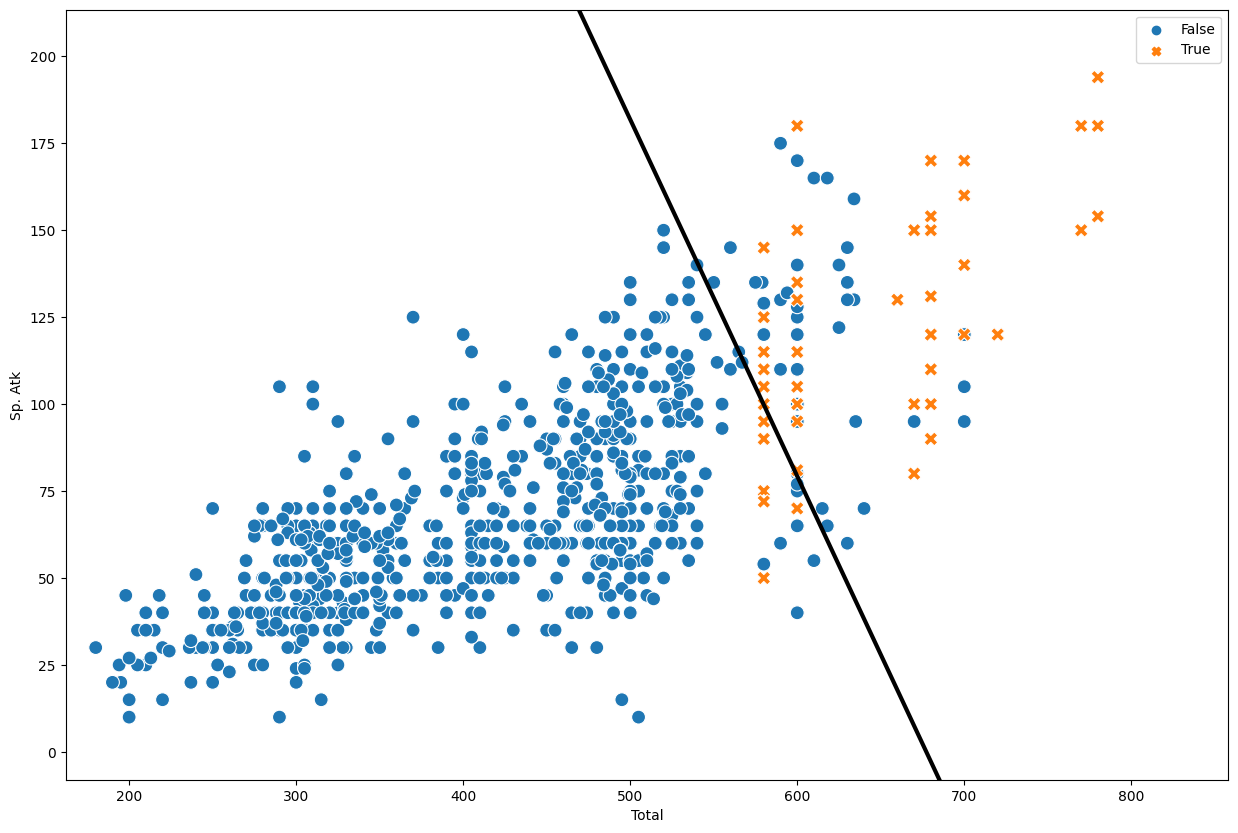

In [ ]:
#MAIN
epoch = 10000   # num of trials
rate = 0.0001  # amount we change each time. (needs to be smaller when using largers axes)

                # 0 = ax + by + c.  can be anything, I set them to numbers that are kinda close to correct
a = 1           # a rotates around y intercept (+ = clockwise)
b = 1           # b rotates around x intercept (+ = counter-clockwise)
c = -300        # c translates up and down (+ = down)

for i in range(epoch):
  #returns a random point from the dataframe
  point = points.sample()

  #set variables
  x = int(point[xAxis])                           #x value of the point
  y = int(point[yAxis])                         #y value of the point
  belongsAboveLine = point[dividingBool].bool()      #if the point is legendary. this is my dividing variable
  isAboveLine = y - equation(a,b,c,x) > 0           #is the point's y is bigger than the lines, the point is above

  # if point is happy, do nothing
  if (isAboveLine and belongsAboveLine) or (not isAboveLine and not belongsAboveLine):
    continue

  #distance from line to point
  confidence = sigmoidPrediction(a,b,c,x,y)  #using a logistic index, get the confidence that it is on the right side of the line
  state = int(belongsAboveLine)              #convert the bool 'belongs above line' to a 1 or a 0
  logLossFunction = state - confidence       #logistic loss is the difference between the predicted confidence and the real outcome

  a += rate * x * logLossFunction
  b += rate * y * logLossFunction
  c += rate * logLossFunction

#draw
graph(a,b,c)